In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
samples = 2000
depth   = 20

In [3]:
class TradeGenerator:
    def __init__(self, count=10000):
        self.count = count
        self.value = 100
        self.ema = self.value
        self.trend = np.random.uniform()

        self.spike_rate = 0.80 + 0.2*np.random.uniform()
        self.cycle_rate = 0.80 + 0.2*np.random.uniform()
        self.trend_rate = 0.80 + 0.2*np.random.uniform()
        
    def __iter__(self):
        while self.count > 0:
            self.count -= 1
        
            self.value += np.random.normal() + self.trend

            # spike
            if np.random.uniform() > self.spike_rate:
                self.value += (np.random.uniform() - 0.5)*0.3 * self.value

            # cycling
            ratio = 0.95
            self.ema = ratio * self.ema + (1.0 - ratio) * self.value            
            if np.random.uniform() > self.cycle_rate:
                self.trend = (self.ema - self.value) / (np.random.uniform() * 20 + 10)
            
            # re-trending
            if np.random.uniform() > self.trend_rate:
                # trend change
                self.trend = np.random.normal() 
                
            if self.value < 0.0:
                self.value = 1.0

            yield(self.value)        

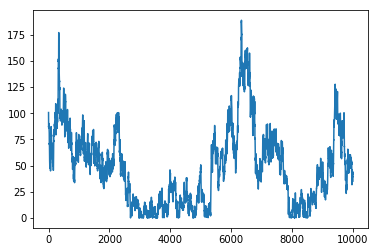

In [5]:
x = [i for i in TradeGenerator()]
plt.plot(x)
plt.show()